## Задание

Изучить поведение модели пуассоновской регрессии для overdispersed-выборок.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Данные

In [0]:
df = pd.DataFrame(data=[], columns=['x', 'y'])

In [0]:
s = np.random.negative_binomial(1, 0.1, 100000)
for i in range(1, 31):
  probability = sum(s < i) / 100000.
  df = df.append({'x' : i, 'y' : probability}, ignore_index=True)

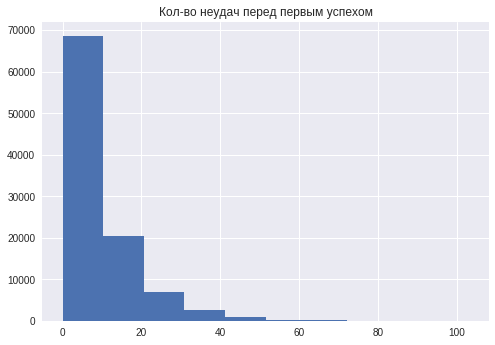

In [0]:
plt.style.use('seaborn')
plt.title('Кол-во неудач перед первым успехом')
plt.hist(s)
plt.show()

In [0]:
df.head()

,x,y
0,1.0,0.10068
1,2.0,0.19109
2,3.0,0.27319
3,4.0,0.34594
4,5.0,0.41082


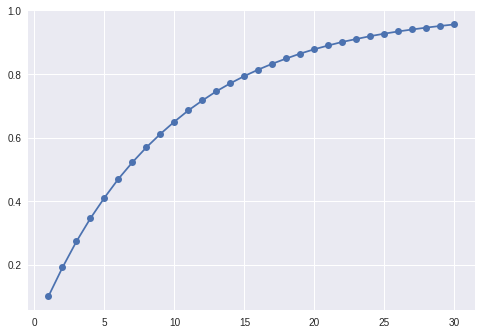

In [0]:
plt.style.use('seaborn')
plt.plot(df['x'], df['y'], '-o')
plt.show()

In [0]:
import statsmodels.api as sm
model = sm.GLM.from_formula('y~x',
                            data=df, family=sm.families.NegativeBinomial()).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            72.4093 
Link Function:      log              BIC:            -94.6327
Dependent Variable: y                Log-Likelihood: -34.205 
Date:               2019-04-27 16:12 LL-Null:        -34.881 
No. Observations:   30               Deviance:       0.60081 
Df Model:           1                Pearson chi2:   0.497   
Df Residuals:       28               Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
--------------------------------------------------------------
Intercept  -1.0124    0.6486  -1.5611  0.1185  -2.2836  0.2587
x           0.0399    0.0337   1.1822  0.2371  -0.0262  0.1060
=============================================================

"""

In [0]:
model.bic

-94.63272042388395

Показатель overdispersion/underdispersion:  chi2 / Df Residuals

KendalltauResult(correlation=1.0, pvalue=7.539975257631811e-33)

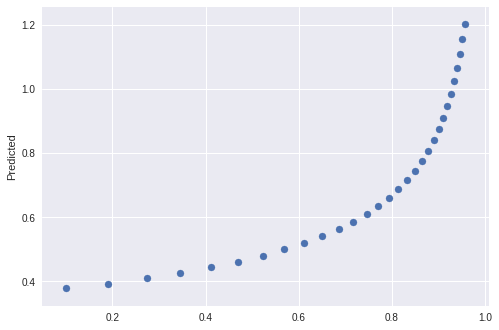

In [0]:
plt.scatter(df['y'], model.predict(df['x']))
plt.ylabel('Predicted')
import scipy.stats as st
st.kendalltau(df['y'], model.predict(df['x']))